In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def transform_bitcoin_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    This function adds the following columns to our bitcoin dataframe:
    %PriceChange: To look at price change within a day
    priceDiff: To look at the per day absolute price change
    normalizedVol: To compare relative trading activity
    7DayMovingAvgPrice: To be able to observe long-term effects
    30DayMovingAvgPrice: To be able to observe long-term effects
    7DayMovingAvgVol: To be able to observe long-term effects
    30DayMovingAvgVol: To be able to observe long-term effects
    
    Note: The first 7 or 30 values for Moving averages for a week or month, respectively,
        are NaN values because there aren't sufficient rows to calculate the average. 
        We have decided to leave these values as NaN to preserve data integrity and not fill
        them which could possibly distort our analysis.
    
    TODO: Add Event flag: Pre [1], During[2], Post[3]
    TODO: Add doctests to see if the calculations are correct
    
    :param data: bitcoin dataframe
    :return: data: bitcoin dataframe with the columns above
    """
    # Adding column for % Price Change per day 
    data['%PriceChange'] = round(((data['Close'] - data['Open']) / data['Open']) * 100, 3)
    
    # Adding column for price difference
    data['priceDiff'] = round(data['Close'] - data['Open'], 3)
    
    # Adding column to look at the normalized trading volume
    data['normalizedVol'] = data['Volume'] / data['Volume'].max()
    
    # Adding columns for moving averages to compare long-term results
    # Learnt about the rolling function through ChatGPT
    data['7DayMovingAvgPrice'] = round(data['Close'].rolling(window=7).mean(), 3)
    data['30DayMovingAvgPrice'] = round(data['Close'].rolling(window=30).mean(), 3)
    data['7DayMovingAvgVol'] = data['normalizedVol'].rolling(window=7).mean()
    data['30DayMovingAvgVol'] = data['normalizedVol'].rolling(window=30).mean()
    
    return data

In [48]:
def get_bitcoin_data(filename: str) -> pd.DataFrame:
    """
    Reads the bitcoin csv data into a pandas dataframe.
    
    :param filename: bitcoin csv file name
    :return: df: bitcoin data as a pandas dataframe
    """
    
    df = pd.read_csv(filename)
    
    # converting 'Date' column to pd.datetime format to perform calculations
    df['Date'] = pd.to_datetime(df['Date'])
    
    df = transform_bitcoin_data(df)
    
    return df

In [49]:
bitcoin_df = get_bitcoin_data('bitcoin_historical_data.csv')

In [50]:
bitcoin_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', '%PriceChange', 'priceDiff', 'normalizedVol',
       '7DayMovingAvgPrice', '30DayMovingAvgPrice', '7DayMovingAvgVol',
       '30DayMovingAvgVol'],
      dtype='object')

Studying Price trends within our Bitcoin data

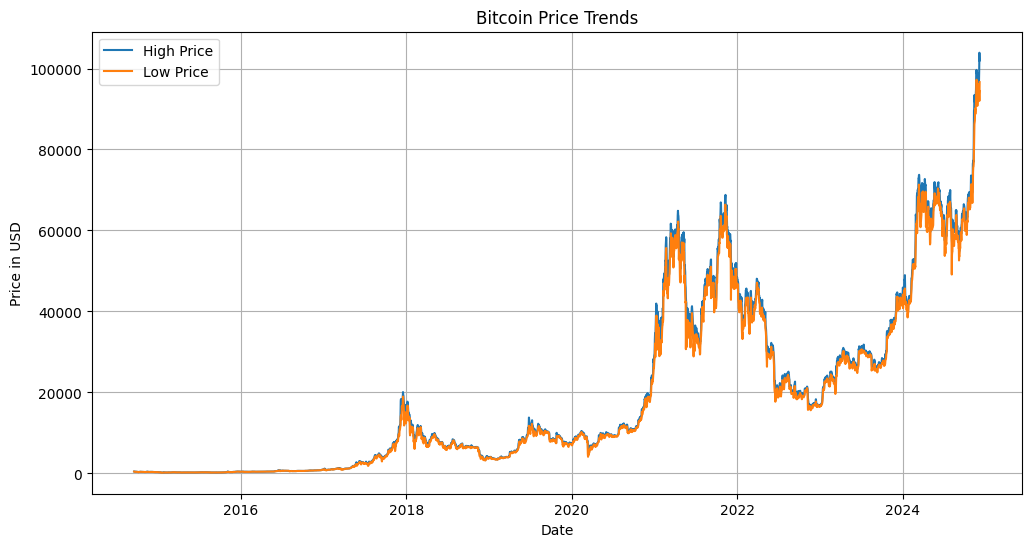

In [55]:
# Observing price trends (Open, High, Low, Close)
plt.figure(figsize=(12, 6))
# plt.plot(bitcoin_df['Date'], bitcoin_df['Open'], label='Open Price')
plt.plot(bitcoin_df['Date'], bitcoin_df['High'], label='High Price')
plt.plot(bitcoin_df['Date'], bitcoin_df['Low'], label='Low Price')
# plt.plot(bitcoin_df['Date'], bitcoin_df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price Trends')
plt.legend()
plt.grid(True)
plt.show()

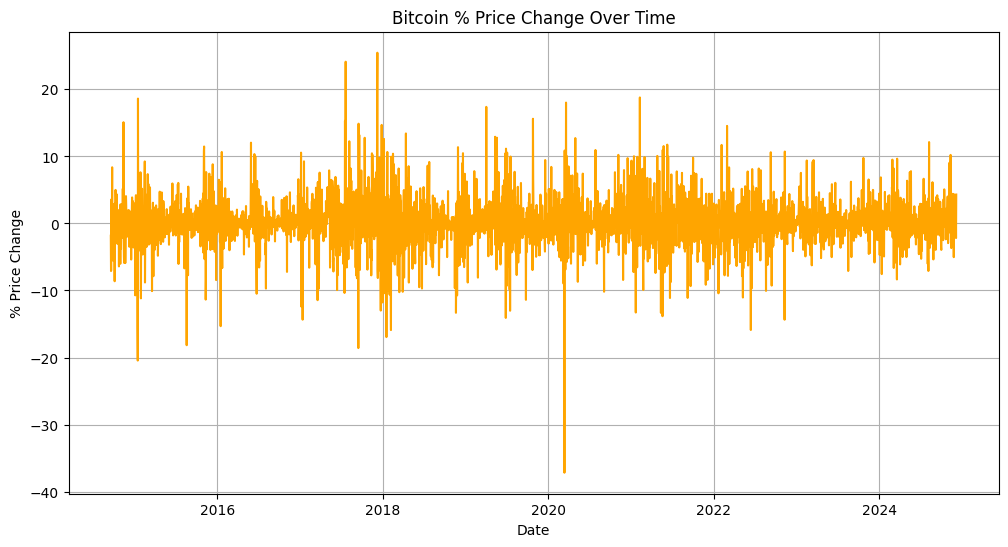

In [57]:
#  % price change over time
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df['Date'], bitcoin_df['%PriceChange'], label='% Price Change', color='orange')
plt.xlabel('Date')
plt.ylabel('% Price Change')
plt.title('Bitcoin % Price Change Over Time')
plt.grid(True)
plt.show()

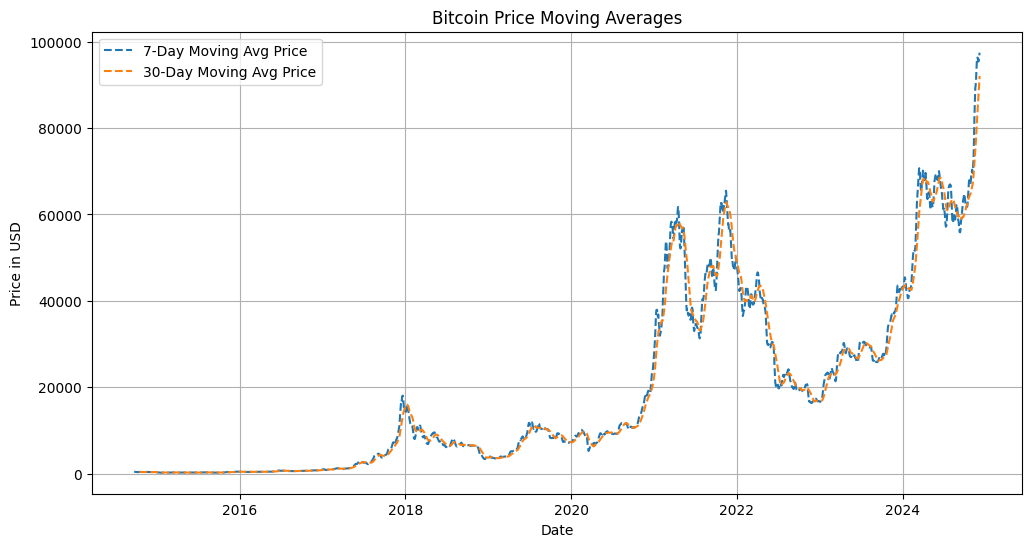

In [59]:
# price averages over time
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df['Date'], bitcoin_df['7DayMovingAvgPrice'], label='7-Day Moving Avg Price', linestyle='--')
plt.plot(bitcoin_df['Date'], bitcoin_df['30DayMovingAvgPrice'], label='30-Day Moving Avg Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Bitcoin Price Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

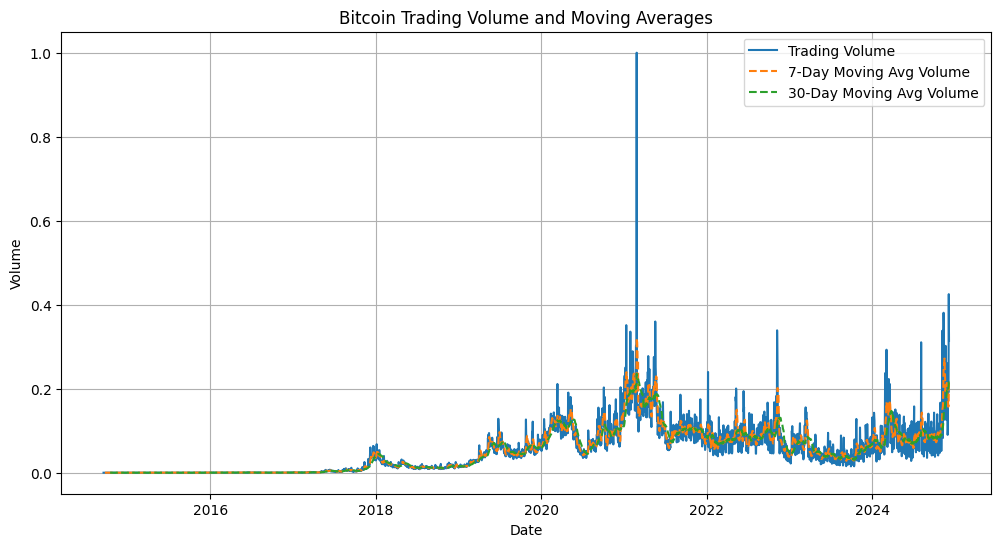

In [61]:
# trading volume averages
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_df['Date'], bitcoin_df['normalizedVol'], label='Trading Volume')
plt.plot(bitcoin_df['Date'], bitcoin_df['7DayMovingAvgVol'], label='7-Day Moving Avg Volume', linestyle='--')
plt.plot(bitcoin_df['Date'], bitcoin_df['30DayMovingAvgVol'], label='30-Day Moving Avg Volume', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Bitcoin Trading Volume and Moving Averages')
plt.legend()
plt.grid(True)
plt.show()